In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import scipy
import scipy.signal

In [2]:
### FFT
def fft_norm(img):
    w, h = img.shape
    img_fft = np.abs(np.fft.fftshift(np.fft.fftn(img)))**2
    img_fft = np.log(img_fft / img_fft[w//2+w%2, h//2+h%2])
    return img_fft

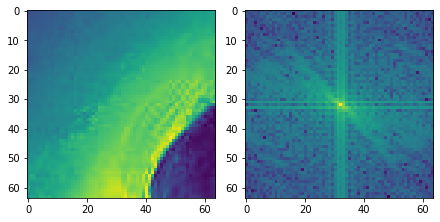

In [37]:
### Input image
img_path = '/Users/mahyar/Downloads/monet.jpg'
img = Image.open(img_path)
w, h = img.size
img = img.crop((0, 0, min(w,h), min(w,h)))
#img = img.resize((256, 256), Image.BILINEAR)
img = ImageOps.grayscale(img)
img = np.asarray(img)
win = np.hanning(img.shape[1])
win_img = np.outer(win, win)
img = img * win_img
img = img[128-32:128+32, 128-32:128+32]
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].imshow(img)
ax[1].imshow(fft_norm(img))
#fig.savefig('/Users/mahyar/CV_Res/ganist_plot/ganist/logs_temp/original.png', dpi=300)

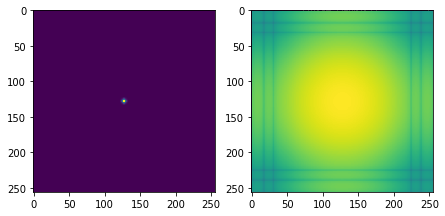

In [32]:
### Gaussian image
std = 2
gw = 7
t = np.linspace(-gw, gw, 2*gw)
gaussian = lambda x, s: np.exp(-0.5 * x**2/s**2) / np.sqrt(2*np.pi*s)
gauss_img = gaussian(t, std).reshape((-1, 1)) @ gaussian(t, std).reshape((1, -1))
gauss_img = gauss_img / np.sum(gauss_img)

### Gauss image crop
filter_img = np.zeros((256, 256))
filter_img[128-gw:128+gw, 128-gw:128+gw] = gauss_img

fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].imshow(filter_img)
ax[1].imshow(fft_norm(filter_img))

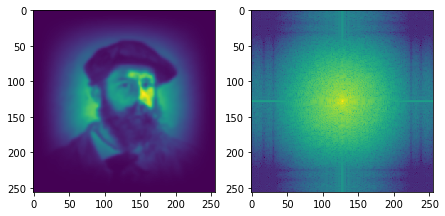

In [34]:
### Convolve
filter_img = gauss_img
conv_img = scipy.signal.convolve2d(img, filter_img, mode='same')
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].imshow(conv_img)
ax[1].imshow(fft_norm(conv_img))
#fig.savefig('/Users/mahyar/CV_Res/ganist_plot/ganist/logs_temp/same_conv7x7.png', dpi=300)

In [ ]:
a = np.array([1, 2, 3])
b = a * 10
a.reshape((-1, 1)) @ b.reshape((1, -1))